### KNN

Since KNN is relatively slow, it is not suitable for large datasets. Here we use a relatively small dataset fruit_data_with_colors.txt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_table('fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
target_fruits_name = dict(zip(df.fruit_label.unique(), df.fruit_name.unique()))
print(target_fruits_name)
X = df[['mass', 'width', 'height']]
y = df['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


Since KNN is an algorithm based on distance, we need to standardize the data to prevent the model to be dominated by features having much larger scales than others.

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# we define a new function to give us evaluation metrics and visualizations (with codes in Logistic_Regression.ipynb)
def plot_confusion(model, X_test, y_test):
  # predicted values on the testing data
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  # The confusion matrix
  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

  # Convert confusion matrix into dataframe
  matrix_df = pd.DataFrame(confusion_matrix)


  plt.figure(figsize=(6,6))
  ax = plt.axes()
  sns.set(font_scale=1.3)

  sns.heatmap(matrix_df,
              annot = True, 
              fmt = "g",
              ax = ax, 
              cmap = "magma", 
              cbar = False)

  ax.set_title("Confusion Matrix")
  ax.set_xlabel("Predicted Label", fontsize=15)
  ax.set_xticklabels([1,2,3,4])
  ax.set_ylabel("True Label", fontsize=15)
  ax.set_yticklabels([1,2,3,4], rotation=0)
  plt.show()

#### Using Python's packages for KNN

*****************************
The number of neighbors is:  1
              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       1.00      1.00      1.00         2
           3       0.75      0.67      0.71         9
           4       1.00      1.00      1.00         3

    accuracy                           0.72        18
   macro avg       0.79      0.79      0.79        18
weighted avg       0.74      0.72      0.73        18



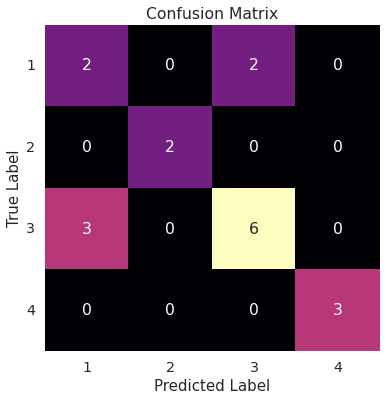

*****************************
The number of neighbors is:  3
              precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       1.00      1.00      1.00         2
           3       0.86      0.67      0.75         9
           4       1.00      1.00      1.00         3

    accuracy                           0.78        18
   macro avg       0.84      0.85      0.84        18
weighted avg       0.82      0.78      0.79        18



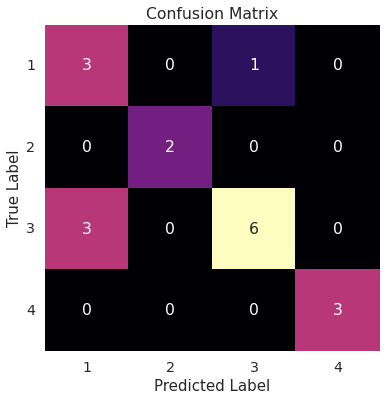

*****************************
The number of neighbors is:  5
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         4
           2       1.00      1.00      1.00         2
           3       0.71      0.56      0.63         9
           4       1.00      1.00      1.00         3

    accuracy                           0.67        18
   macro avg       0.76      0.76      0.76        18
weighted avg       0.71      0.67      0.68        18



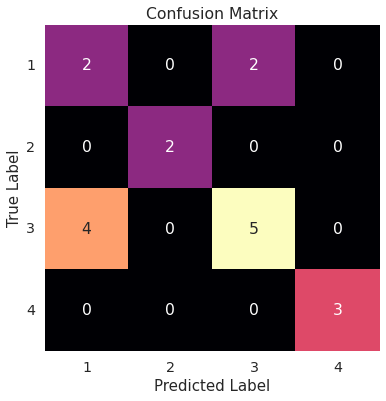

*****************************
The number of neighbors is:  7
              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       1.00      1.00      1.00         2
           3       0.75      0.67      0.71         9
           4       1.00      1.00      1.00         3

    accuracy                           0.72        18
   macro avg       0.79      0.79      0.79        18
weighted avg       0.74      0.72      0.73        18



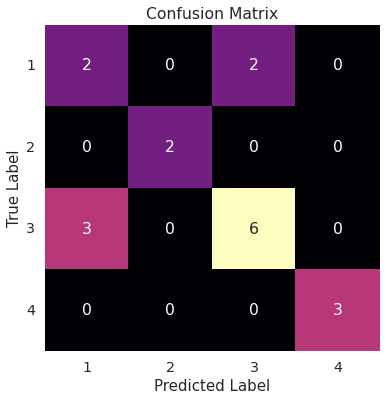

*****************************
The number of neighbors is:  9
              precision    recall  f1-score   support

           1       0.43      0.75      0.55         4
           2       1.00      1.00      1.00         2
           3       0.83      0.56      0.67         9
           4       1.00      1.00      1.00         3

    accuracy                           0.72        18
   macro avg       0.82      0.83      0.80        18
weighted avg       0.79      0.72      0.73        18



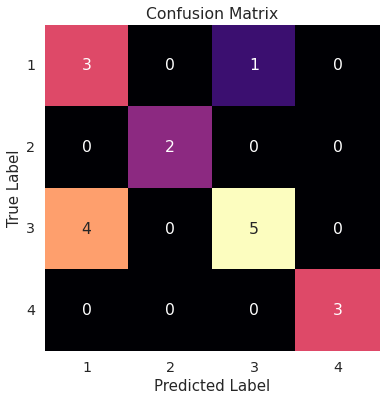

In [ ]:
num_neighbors = [x for x in range(1,11,2)]
error_rates = []
for nn in num_neighbors:
  print('*****************************')
  print('The number of neighbors is: ', nn) 
  knn_clf = KNeighborsClassifier(n_neighbors = nn, metric = 'minkowski')
  knn_clf.fit(X_train_std, y_train)
  # print precision, recall, plot confusion matrix
  plot_confusion(knn_clf, X_test_std, y_test)
  error_rates.append(sum(y_test != knn_clf.predict(X_test_std))/len(y_test))

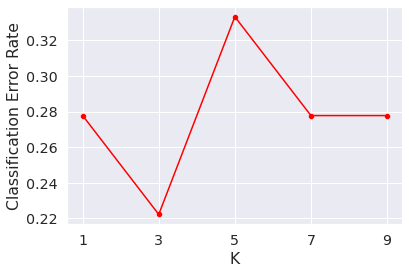

In [ ]:
sns.lineplot(num_neighbors, error_rates, color = 'red')
sns.scatterplot(num_neighbors, error_rates, color = 'red')
plt.xlabel('K')
plt.ylabel('Classification Error Rate')
plt.xticks(num_neighbors)
plt.show()

#### Self-implementation of KNN

In [ ]:
from scipy.stats import mode
class K_Nearest_Neighbors_Classifier() : 
      
    def __init__(self, K) :
        self.K = K

        # find the K nearest neighbors to current test example
    def find_neighbors(self, x) :
        # calculate euclidean distances between current test example x and training set X_train
          
        euclidean_distances = np.zeros(self.m)

        for i in range(self.m) :
            d = self.euclidean(x, self.X_train[i])
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and store
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]
      
    # calculate euclidean distance
    def euclidean(self, x, x_train) :
        return np.sqrt(np.sum(np.square(x - x_train)))
          
    # store training set  
    def fit(self, X_train, Y_train) :
        self.X_train = X_train
        self.Y_train = Y_train
          
        # num_of_training_examples, num_of_features
        self.m, self.n = X_train.shape
      
    # prediction   
    def predict(self, X_test) :
        self.X_test = X_test

        # num_of_test_examples, num_of_features
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
        Y_predict = np.zeros(self.m_test)
          
        for i in range(self.m_test) : 
            x = self.X_test[i]
            # find the K nearest neighbors from current test example
            neighbors = np.zeros(self.K)
            neighbors = self.find_neighbors(x)
              
            # most frequent class in K neighbors
            Y_predict[i] = mode(neighbors)[0][0]    
              
        return Y_predict

In [ ]:
num_neighbors

[1, 3, 5, 7, 9]

The number of neighbors is:  1
The number of neighbors is:  3
The number of neighbors is:  5
The number of neighbors is:  7
The number of neighbors is:  9


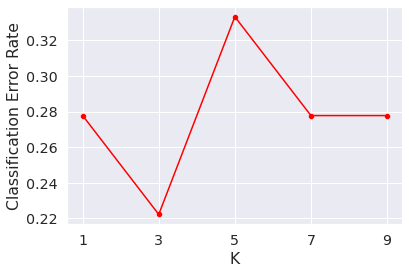

In [ ]:
classification_errors = []

for k in num_neighbors:
  print('The number of neighbors is: ', k) 
  my_knn = K_Nearest_Neighbors_Classifier(K = k)
  y_train = np.array(y_train)
  y_test = np.array(y_test)
  my_knn.fit(X_train_std, y_train)
  classification_errors.append(sum(y_test != my_knn.predict(X_test_std))/len(y_test))

# plot number of neighbors and errors
sns.lineplot(num_neighbors, classification_errors, color = 'red')
sns.scatterplot(num_neighbors, classification_errors, color = 'red')
plt.xlabel('K')
plt.ylabel('Classification Error Rate')
plt.xticks(num_neighbors)
plt.show()